# Tutorial 8
## PageRank

### Setup

First of all, we authenticate a Google Drive client to download the dataset we will be processing in this Colab.

**Make sure to follow the interactive instructions.**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1EoolSK32_U74I4FeLox88iuUB_SUUYsI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('web-Stanford.txt')


If you executed the cells above, you should be able to see the dataset we will use for this Colab under the "Files" tab on the left panel.

Next, we import some of the common libraries needed for our task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Loading

For this Colab we will be using [NetworkX](https://networkx.github.io), a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

The dataset we will analyze is a snapshot of the Web Graph centered around [stanford.edu](https://stanford.edu), collected in 2002. Nodes represent pages from Stanford University (stanford.edu) and directed edges represent hyperlinks between them. [[More Info]](http://snap.stanford.edu/data/web-Stanford.html)

In [ ]:
import networkx as nx
G = nx.read_edgelist('web-Stanford.txt', create_using=nx.DiGraph)

In [ ]:
print(G.number_of_nodes(),"nodes")
print(G.number_of_edges(),"edges")

281903 nodes
2312497 edges


### NetworkX Introduction

For starters, let's take a look at the package's capability. Detailed introduction can be found through this link: https://networkx.org/documentation/stable/reference/introduction.html.
We may first try to create a graph
NetworkX graph objects can be created in one of three ways:
1. Adding edges and nodes explicitly.
2. Importing data from pre-existing (usually file) sources.
3. Graph generators—standard algorithms to create network topologies.


For starters, let us create a graph by adding edges and nodes explicitly.

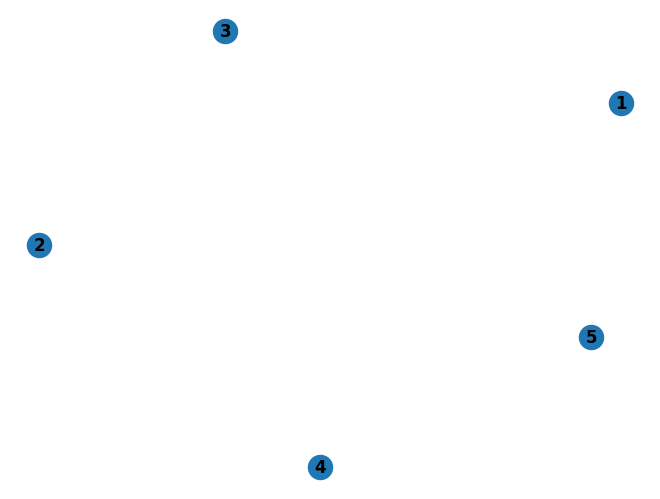

In [ ]:
##. Create an undirected graph.
G_example = nx.Graph()
##. Add one node at a time.
G_example.add_node(1)
##. Add nodes from any iterable container, such as a list.
G_example.add_nodes_from([2, 3])
G_example.add_nodes_from(set([4,5]))
##. Add nodes while assigning attributes.
G_example.add_nodes_from([
     (4, {"color": "red"}),
     (5, {"color": "green"}),
 ])
nx.draw(G_example, with_labels=True, font_weight='bold') 

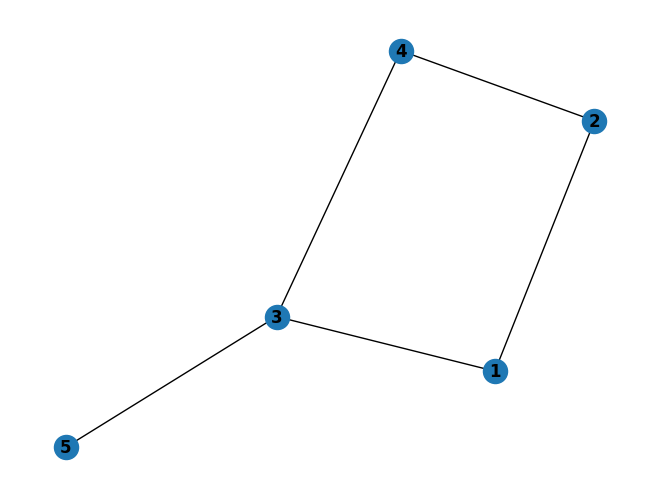

In [ ]:
##. Add paths.
G_example.add_edge(2, 1)
G_example.add_edge(1, 3)
G_example.add_edge(2, 4)
G_example.add_edge(3, 5)
G_example.add_edge(4, 3)
nx.draw(G_example, with_labels=True, font_weight='bold') 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
<class 'networkx.classes.reportviews.NodeView'>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[(1, 3), (1, 2), (1, 5), (2, 1), (2, 4), (7, 8), (9, 10), (9, 11), (10, 11), (11, 10)]


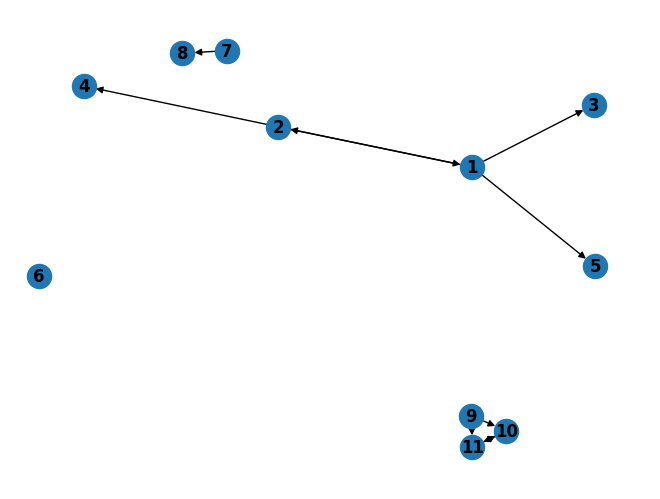

In [ ]:
##. Create a directed graph.
G_example.clear()
G_example = nx.DiGraph()
G_example.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
G_example.add_edge(2, 1)   # adds the nodes in order 2, 1
G_example.add_edge(1, 3)
G_example.add_edge(2, 4)
G_example.add_edge(1, 2)
G_example.add_edge(1, 5)
G_example.add_edge(7, 8)
G_example.add_edge(9, 10)
G_example.add_edge(9, 11)
G_example.add_edge(10, 11)
G_example.add_edge(11, 10)

nx.draw(G_example, with_labels=True, font_weight='bold') 
print(G_example.nodes)
print(type(G_example.nodes))
print(list(G_example.nodes))
print(list(G_example.edges))

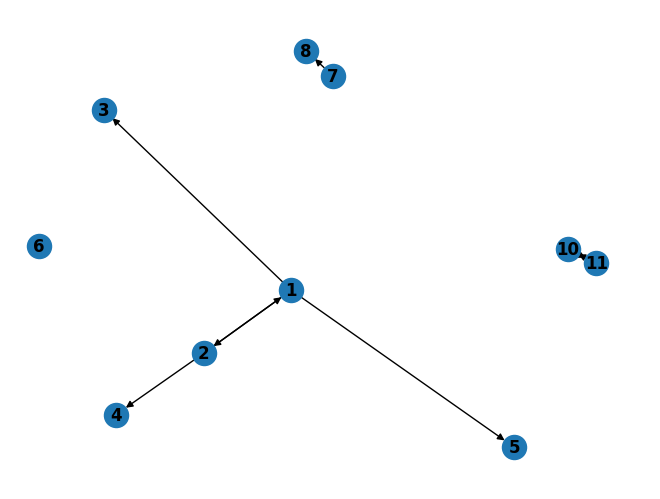

In [ ]:
##. Remove a node, along with the corresponding edges.
G_example.remove_node(9)
nx.draw(G_example, with_labels=True, font_weight='bold') 

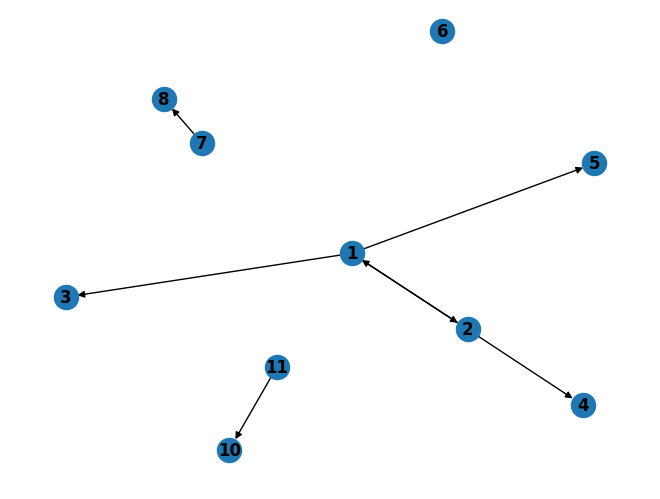

In [ ]:
## Remove an edge.
G_example.remove_edge(10,11)
nx.draw(G_example, with_labels=True, font_weight='bold') 

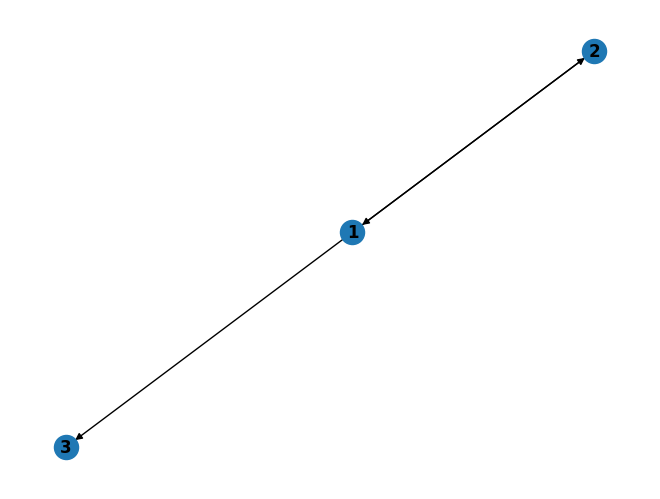

In [ ]:
##. Extract a subgraph.
Component1 = nx.subgraph(G_example,[1,2,3])
nx.draw(Component1, with_labels=True, font_weight='bold') 

[3, 2, 5]
4
[(1, 4), (2, 3)]
G_example strong connectivity: False
Component1 strong connectivity: False
G_example weak connectivity: False
Component1 weak connectivity: True
G1_example strong connectivity: True


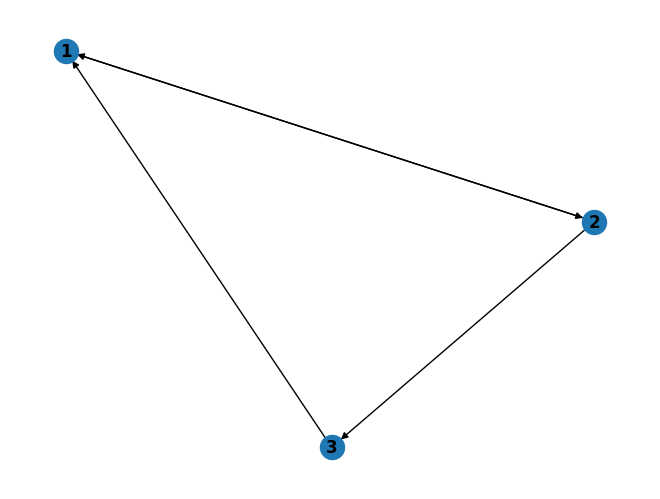

In [ ]:
##. Examine the graph
print(list(G_example.adj[1])) # or list(G.neighbors(1))

print(G_example.degree[1])  # the number of edges incident to 1
print(G_example.degree([1,2]))

##. Test for strong connectivity & weak connectivity
print("G_example strong connectivity:", nx.is_strongly_connected(G_example))
print("Component1 strong connectivity:", nx.is_strongly_connected(Component1))
print("G_example weak connectivity:", nx.is_weakly_connected(G_example))
print("Component1 weak connectivity:", nx.is_weakly_connected(Component1))

G1_example = nx.DiGraph()
G1_example.add_nodes_from([1,2,3])
G1_example.add_edge(1, 2)   
G1_example.add_edge(2, 1)
G1_example.add_edge(3, 1)
G1_example.add_edge(2, 3)

nx.draw(G1_example, with_labels=True, font_weight='bold') 
print("G1_example strong connectivity:", nx.is_strongly_connected(G1_example))

<class 'generator'>
[{1, 2, 3, 4, 5}, {6}, {8, 7}, {10, 11}]
[{1, 2, 3, 4, 5}, {8, 7}, {10, 11}, {6}]
[1, 2, 3, 4, 5]


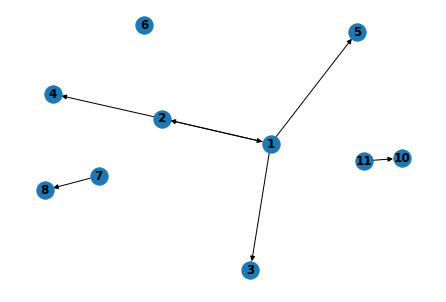

In [ ]:
##. Get strongly or weakly connected components.
nx.draw(G_example, with_labels=True, font_weight='bold') 
print(type(nx.weakly_connected_components(G_example)))
print(list(nx.weakly_connected_components(G_example)))
##. Sort the connected components.
print(sorted(nx.weakly_connected_components(G_example), key=len, reverse=True))
largest_wcc = max(nx.weakly_connected_components(G_example), key=len)
print(list(largest_wcc))

### Your Task

To begin with, let's simplify our analysis by ignoring the dangling nodes and the disconnected components in the original graph.

Use NetworkX to identify the **largest** weakly connected component in the ```G``` graph.  From now on, use this connected component for all the following tasks.

A directed graph is  **strongly** connected if there is a path from a to b and from b to a whenever a
and b are vertices in the graph.

A directed graph is  **weakly** connected if there is a path between every two vertices in the underlying
undirected graph, ignoring the direction of edges.

In [ ]:
# YOUR CODE HERE



Let us use an example to solve a pagerank vector in class.

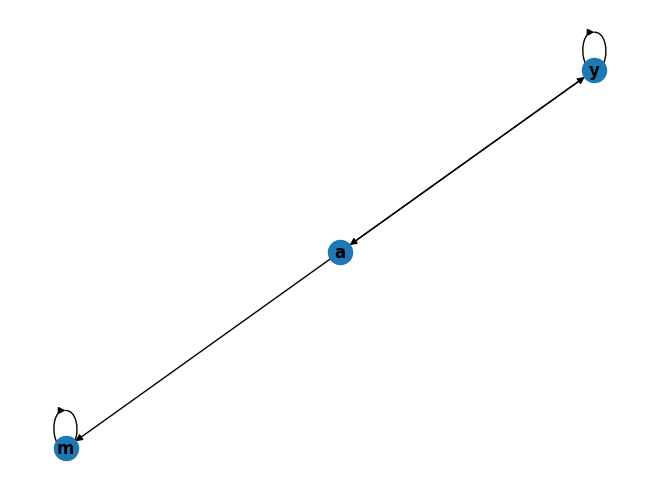

In [ ]:
G_example1 = nx.DiGraph()
G_example1.add_nodes_from(["y","a","m"])
G_example1.add_edge("y", "y")   # adds the nodes in order 2, 1
G_example1.add_edge("y", "a")
G_example1.add_edge("a", "y")
G_example1.add_edge("a", "m")
G_example1.add_edge("m", "m")
nx.draw(G_example1, with_labels=True, font_weight='bold') 

In [ ]:
pr = nx.pagerank(G_example1,alpha = 0.8)
print(pr)
print(np.round(np.array(list(pr.values())) * 33,3))


{'y': 0.21212254941844777, 'a': 0.1515159780102962, 'm': 0.636361472571256}
[ 7.  5. 21.]


Compute the PageRank vector, using the default parameters in NetworkX: [https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pageranky](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [ ]:
# YOUR CODE HERE


In 1999, Barabási and Albert proposed an elegant mathematical model which can generate graphs with topological properties similar to the Web Graph (also called Scale-free Networks).

If you complete the steps below, you should obtain some empirical evidence that the Random Graph model is inferior compared to the Barabási–Albert model when it comes to generating a graph resembling the World Wide Web!

As such, we will use two different graph generator methods, and then we will test how well they approximate the Web Graph structure by means of comparing the respective PageRank vectors. [[NetworkX Graph generators]](https://networkx.github.io/documentation/stable/reference/generators.html#)

Using the parameters ```seed = 1``` and ```directed=False``` where applicable, generate:


1.   a random graph (with the fast method), setting ```n``` equal to the number of nodes in the original connected component, and ```p = 0.00008```
2.   a Barabasi-Albert graph (with the standard method), setting ```n``` equal to the number of nodes in the original connected component, and finding the right ***integer*** value for ```m``` such as the resulting number of edges **approximates by excess** the number of edges in the original connected component

and compute the PageRank vectors for both graphs.


In [ ]:
# YOUR CODE HERE


Compare the PageRank vectors obtained on the generated graphs with the PageRank vector you computed on the original connected component.
**Sort** the components of each vector by value, and use cosine similarity as similarity measure. 

Feel free to use any implementation of the cosine similarity available in third-party libraries, or implement your own with ```numpy```.

In [ ]:
# YOUR CODE HERE

from scipy import spatial
vec1 = [1, 2, 3, 4]
vec2 = [5, 6, 7, 8]
cos_sim = 1 - spatial.distance.cosine(vec1, vec2)
print(cos_sim)

0.9688639316269664
